In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # corrected typo here
import seaborn as sns 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.ensemble import AdaBoostRegressor
from sklearn.impute import SimpleImputer


In [3]:
data = pd.read_csv('box_office.csv', encoding='latin-1')
data

FileNotFoundError: [Errno 2] No such file or directory: 'box_office.csv'

In [ ]:
data.head(10)

,movie_title,director_name,title_year,facenumber_in_poster,director_ig_followers,actor_1_name,actor_1_ig_follow,actor_2_name,actor_2_ig_follow,duration,genres,plot_keywords,buget,gross,num_critic_for_review,num_user_for_review,imdb_socre,num_awards_won,box_office
0,Rogue One: A Star Wars Story,Gareth Edwards,2016,7,4451.0000,Felicity Jones,9.950000e+04,Diego Luma,1.396998e+07,133,Action| Adventure| Sci-Fi,0,2.000000e+08,532000000,65,373473,7.9,8,532171696.0
1,Captain America: Civil War,Anthony Russo,2016,10,24000.0000,Chris Evans,3.700000e+06,Robert Downey,5.680000e+07,147,Action| Adventure| Sci-Fi,0,2.500000e+08,408000000,75,451386,7.9,13,408080554.0
2,The Jungle Book (2016),Jon Favreau,2016,1,240000.0000,Neel Sethi,4.440000e+05,Idris Elba,6.500000e+06,106,Adventure| Drama| Family,0,1.700000e+08,364000000,77,211530,7.5,2,363995937.0
3,Zootopia,Byron Howard,2016,2,355591.1935,Ginnifer Goodwin,3.430000e+05,Jason Bateman,1.396998e+07,108,Animation| Adventure| Comedy,0,8.990267e+07,341000000,78,320880,8.0,47,341264012.0
4,Suicide Squad,David Ayer,2016,10,55300.0000,Will Smith,2.760000e+05,Margot Robbie,1.396998e+07,137,Action| Adventure| Fantasy,0,1.750000e+08,325000000,40,446021,6.2,13,325021779.0
5,Moana,Ron Clements,2016,2,180.0000,Aulil Cavalho,8.327752e+06,Dwayne Johnson,3.970000e+08,107,Animation| Adventure| Comedy,0,8.990267e+07,249000000,81,161930,7.6,21,248752120.0
6,Doctor Strange,Scott Derrickson,2016,1,129000.0000,Benedict Cumberback,8.327752e+06,Benedict Wong,1.396998e+07,115,Action| Adventure| Fantasy,0,1.650000e+08,233000000,72,358456,7.5,6,232630718.0
7,Jason Bourne,Paul Greengrass,2016,1,0.0000,Matt Damon,1.070000e+05,Jeremy Renner,2.100000e+07,123,Action| Thriller,0,1.200000e+08,162000000,58,165127,6.7,3,162162120.0
8,X-Men: Apocalypse,Bryan Singer,2016,11,236000.0000,Olivia Munn,2.900000e+06,Oscar Isaac,1.396998e+07,144,Action| Adventure| Sci-Fi,0,1.780000e+08,155000000,52,300654,7.0,3,135729385.0
9,La La Land,Damien Chazelle,2016,2,1959.0000,Ryan Reylonds,5.150000e+07,Emma Stone,1.396998e+07,128,Comedy| Drama| Music,0,3.000000e+07,151000000,93,322878,8.1,232,151058124.0


In [ ]:
data.columns 

Index(['movie_title', 'director_name', 'title_year', 'facenumber_in_poster',
       'director_ig_followers', 'actor_1_name', 'actor_1_ig_follow',
       'actor_2_name', 'actor_2_ig_follow', 'duration', 'genres',
       'plot_keywords', 'buget', 'gross', 'num_critic_for_review',
       'num_user_for_review', 'imdb_socre', 'num_awards_won', 'box_office'],
      dtype='object')

In [ ]:
# Display shape of dataset
print("Shape of dataset:", data.shape)

Shape of dataset: (79, 19)


In [ ]:
# Check for null values
print("Null values in dataset:")
print(data.isnull().sum())




Null values in dataset:
movie_title              0
director_name            0
title_year               0
facenumber_in_poster     0
director_ig_followers    0
actor_1_name             0
actor_1_ig_follow        0
actor_2_name             0
actor_2_ig_follow        0
duration                 0
genres                   0
plot_keywords            0
buget                    0
gross                    0
num_critic_for_review    0
num_user_for_review      0
imdb_socre               0
num_awards_won           0
box_office               0
dtype: int64


In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'data'

# Specify the column name for which you want to calculate the mean of null values
column_name = 'director_ig_followers'
column_name2 = 'actor_2_ig_follow'
column_name3 = 'box_office'
column_name4= 'actor_1_ig_follow'
column_name5='buget'


# Calculate the mean for the specified column where values are null
mean_value = data[column_name].mean()
mean_value2 = data[column_name2].mean()
mean_value3 = data[column_name3].mean()
mean_value4 = data[column_name4].mean()
mean_value5 = data[column_name5].mean()



# Fill null values in the specified column with the calculated mean
data[column_name].fillna(mean_value, inplace=True)
data[column_name2].fillna(mean_value2, inplace=True)
data[column_name3].fillna(mean_value3, inplace=True)
data[column_name4].fillna(mean_value4, inplace=True)
data[column_name5].fillna(mean_value5, inplace=True)



# Verify if nulls are filled
print("Null values after filling with mean:")
print(data.isnull().sum())

data.to_csv('box_office.csv', index=False)

Null values after filling with mean:
movie_title              0
director_name            0
title_year               0
facenumber_in_poster     0
director_ig_followers    0
actor_1_name             0
actor_1_ig_follow        0
actor_2_name             0
actor_2_ig_follow        0
duration                 0
genres                   0
plot_keywords            0
buget                    0
gross                    0
num_critic_for_review    0
num_user_for_review      0
imdb_socre               0
num_awards_won           0
box_office               0
dtype: int64


In [ ]:
# data.dropna(axis=0,inplace=True)
# data

In [ ]:
data=data.reset_index(drop=True)

In [ ]:
data.to_csv("test_data.csv",index=False)

In [ ]:
data.shape

(79, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_title            79 non-null     object 
 1   director_name          79 non-null     object 
 2   title_year             79 non-null     int64  
 3   facenumber_in_poster   79 non-null     int64  
 4   director_ig_followers  79 non-null     float64
 5   actor_1_name           79 non-null     object 
 6   actor_1_ig_follow      79 non-null     float64
 7   actor_2_name           79 non-null     object 
 8   actor_2_ig_follow      79 non-null     float64
 9   duration               79 non-null     int64  
 10  genres                 79 non-null     object 
 11  plot_keywords          79 non-null     int64  
 12  buget                  79 non-null     float64
 13  gross                  79 non-null     int64  
 14  num_critic_for_review  79 non-null     int64  
 15  num_user

In [ ]:
data['genres'] = data['genres'].astype('category')
data['director_name'] = data['director_name'].astype('category')
data['actor_1_name'] = data['actor_1_name'].astype('category')
data['actor_2_name'] = data['actor_2_name'].astype('category')


In [ ]:
# Select columns with 'category' data type and apply .cat.codes
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)


In [ ]:
data['label'] = data['imdb_socre']  # Corrected column name
data['label'] = data['label'].astype(int)
data['title_year'] = data['title_year'].astype(int)


In [ ]:
data.head()


,movie_title,director_name,title_year,facenumber_in_poster,director_ig_followers,actor_1_name,actor_1_ig_follow,actor_2_name,actor_2_ig_follow,duration,genres,plot_keywords,buget,gross,num_critic_for_review,num_user_for_review,imdb_socre,num_awards_won,box_office,label
0,Rogue One: A Star Wars Story,16,2016,7,4451.0000,19,99500.0,16,13969980.28,133,12,0,2.000000e+08,532000000,65,373473,7.9,8,532171696.0,7
1,Captain America: Civil War,0,2016,10,24000.0000,11,3700000.0,58,56800000.00,147,12,0,2.500000e+08,408000000,75,451386,7.9,13,408080554.0,7
2,The Jungle Book (2016),23,2016,1,240000.0000,47,444000.0,28,6500000.00,106,23,0,1.700000e+08,364000000,77,211530,7.5,2,363995937.0,7
3,Zootopia,4,2016,2,355591.1935,20,343000.0,31,13969980.28,108,28,0,8.990267e+07,341000000,78,320880,8.0,47,341264012.0,8
4,Suicide Squad,9,2016,10,55300.0000,70,276000.0,50,13969980.28,137,10,0,1.750000e+08,325000000,40,446021,6.2,13,325021779.0,6


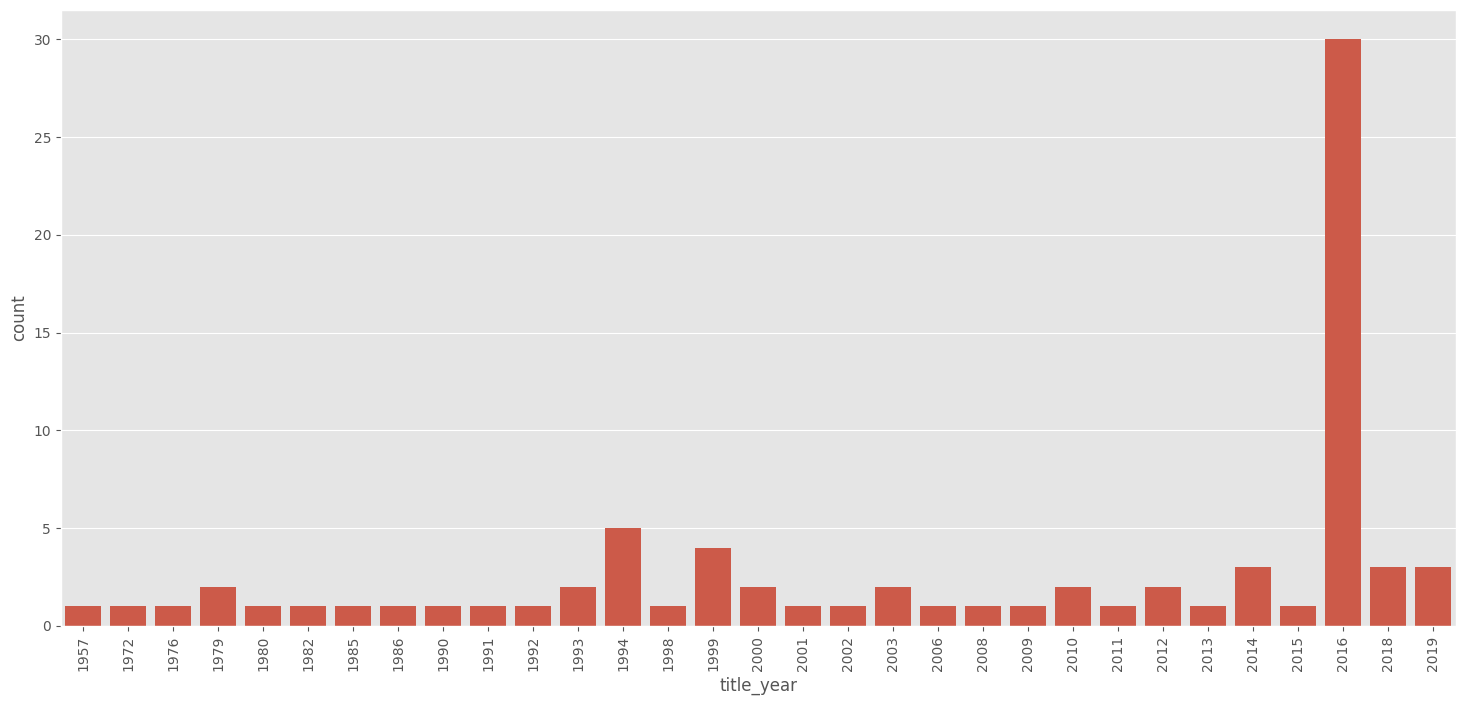

In [ ]:
with plt.style.context("ggplot"):
    plt.figure(figsize=(18, 8))
    sns.countplot(x='title_year', data=data)  # Specify 'x' explicitly
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
X = data.drop(['movie_title','title_year','plot_keywords','label'],axis=1)
y = data['box_office']

In [ ]:
feature_list = X.columns
for column in X.columns:
    unique_values = X[column].unique()
    print(f"Column '{column}' unique values: {unique_values}")
print(X.columns)



Column 'director_name' unique values: [16  0 23  4  9 47 49 35  3  6 34 12 24 46 13 18 55 54  8 19 53 33 10 43
 32  1 36 27 14 22  2 51  5 56 38 40 21 26 28 15 30 39 37 17 11 50 41 44
 52 20 45 48 29 25  7 31 42]
Column 'facenumber_in_poster' unique values: [ 7 10  1  2 11  5  6  0  4  9 23  3]
Column 'director_ig_followers' unique values: [4.45100000e+03 2.40000000e+04 2.40000000e+05 3.55591193e+05
 5.53000000e+04 1.80000000e+02 1.29000000e+05 0.00000000e+00
 2.36000000e+05 1.95900000e+03 1.75000000e+05 5.96500000e+03
 2.58000000e+05 3.78000000e+04 6.81200000e+03 1.22000000e+03
 5.58000000e+04 2.20000000e+06 3.65000000e+04 3.00000000e+04
 7.13500000e+03 4.67000000e+04 1.67000000e+03 8.18000000e+02
 1.43500000e+03 1.44000000e+05 2.85000000e+05 5.67000000e+05
 5.86000000e+04 3.21000000e+03 5.78000000e+05 2.27000000e+05
 1.19000000e+02 5.54000000e+05 4.87000000e+02 3.84000000e+05
 1.90000000e+06 1.44900000e+03 1.06000000e+04 1.89000000e+02
 8.76000000e+02 1.61100000e+03 2.70000000e+06 1.

In [ ]:
import re

# Define a function to convert monetary strings to numeric values
def monetary_to_numeric(value):
    if isinstance(value, str):
        value = re.sub(r'[^\d.]', '', value)  # Remove non-numeric characters
        if value.isdigit():
            return float(value)
        elif 'million' in value:
            return float(value.replace(' million', '')) * 1e6
        elif 'billion' in value:
            return float(value.replace(' billion', '')) * 1e9
    return value

# Specify the columns containing monetary values
monetary_columns = ['buget', 'gross', 'box_office']  # Corrected 'buget' to 'budget'

# Apply the function to the relevant columns
for column in monetary_columns:
    X[column] = X[column].apply(monetary_to_numeric)

print(X.columns)
print(X['duration'].unique())


Index(['director_name', 'facenumber_in_poster', 'director_ig_followers',
       'actor_1_name', 'actor_1_ig_follow', 'actor_2_name',
       'actor_2_ig_follow', 'duration', 'genres', 'buget', 'gross',
       'num_critic_for_review', 'num_user_for_review', 'imdb_socre',
       'num_awards_won', 'box_office'],
      dtype='object')
[133 147 106 108 137 107 115 123 144 128 116 110 101 120  89 102 127 112
 113  87  81  94  99 139 132 146 152 142 117 153 154 149 100 169 136 175
 180 130 178 148 114 189 165  96 155 201 164 121  88 122 111 118 138 179
 151 195]


In [ ]:
# Replace commas in 'duration' column with an empty string
X['duration'] = X['duration'].replace(',', '', regex=True)

# Convert the 'duration' column to numeric, coercing errors to NaN
X['duration'] = pd.to_numeric(X['duration'], errors='coerce')

# Check for any NaN values
nan_values = X['duration'].isna().sum()
print("Number of NaN values in 'duration' column:", nan_values)

unique_durations = X['duration'].unique()
print("Unique values in 'duration' column:")
print(unique_durations)

# Iterate over each value in the 'duration' column
for duration_value in X['duration']:
    try:
        # Attempt to convert the value to an integer
        int(duration_value)
    except ValueError:
        # Print the value if it cannot be converted to an integer
        print("Non-numeric value found:", duration_value)
print("done")
X['duration'] = X['duration'].astype(str).str.replace(r'\D', '', regex=True)

# Convert the 'duration' column to numeric, coercing errors to NaN
X['duration'] = pd.to_numeric(X['duration'], errors='coerce')

# Check for any NaN values
nan_values = X['duration'].isna().sum()
print("Number of NaN values in 'duration' column:", nan_values)

# Drop rows with NaN values in the 'duration' column
X = X.dropna(subset=['duration'])

# Check if there are still non-numeric values in the 'duration' column
if X['duration'].dtype != 'O':
    # Check for negative or zero values in 'duration'
    negative_values = (X['duration'] <= 0).sum()
    if negative_values > 0:
        print("Error: 'duration' column contains negative or zero values after cleaning.")
    else:
        # Now, you can proceed with scaling
        scaler_feature = StandardScaler()
        X_scaled = scaler_feature.fit_transform(X)

        # Save the preprocessed features
        with open(file="module/X_scaled.pkl", mode="wb") as file:
            pickle.dump(obj=X_scaled, file=file)
else:
    print("Error: 'duration' column still contains non-numeric values after cleaning.")
    

Number of NaN values in 'duration' column: 0
Unique values in 'duration' column:
[133 147 106 108 137 107 115 123 144 128 116 110 101 120  89 102 127 112
 113  87  81  94  99 139 132 146 152 142 117 153 154 149 100 169 136 175
 180 130 178 148 114 189 165  96 155 201 164 121  88 122 111 118 138 179
 151 195]
done
Number of NaN values in 'duration' column: 0


In [ ]:
# # Check if 'duration' column exists in X and if it's of string type
# if 'duration' in X.columns and X['duration'].dtype == 'object':
#     # Remove commas from the column
#     X['duration'] = X['duration'].str.replace(',', '')

#     # Convert the column to numeric
#     X['duration'] = pd.to_numeric(X['duration'])

#     # Now, you can proceed with scaling
#     scaler_feature = StandardScaler()
#     X_scaled = scaler_feature.fit_transform(X)

#     # Save the preprocessed features
#     with open(file="module/X_scaled.pkl", mode="wb") as file:
#         pickle.dump(obj=X_scaled, file=file)
# else:
#     print("The 'duration' column either does not exist in the DataFrame 'X' or it's not of string type.")


In [ ]:
# Remove commas from all numeric columns
numeric_columns = ['facenumber_in_poster','director_ig_followers', 'actor_1_ig_follow', 'actor_2_ig_follow', 'duration', 'buget', 'gross', 'num_critic_for_review', 'num_user_for_review', 'imdb_socre','num_awards_won']
X[numeric_columns] = X[numeric_columns].replace(',', '', regex=True)

# Convert the columns to numeric
X[numeric_columns] = X[numeric_columns].apply(pd.to_numeric)

# Now, you can proceed with scaling
scaler_feature = StandardScaler()
X_scaled = scaler_feature.fit_transform(X)

# Save the preprocessed features
with open(file="module/X_scaled.pkl", mode="wb") as file:
    pickle.dump(obj=X_scaled, file=file)


In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# y_train.fillna(y_train.mean(), inplace=True)
# y_test.fillna(y_test.mean(), inplace=True)
# Check for missing values in y
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())

# Verify indexing
print("Indices of y_train:", y_train.index)
print("Indices of y_test:", y_test.index)
print("y_train:", y_train)
print("y_test:", y_test)
y_test.to_csv('y_test.csv',index=False)




(63, 16) (16, 16) (63,) (16,)
Missing values in y_train: 0
Missing values in y_test: 0
Indices of y_train: Index([73, 61, 55, 40,  9, 64,  5, 47, 34, 62, 42, 54, 16, 39, 56, 78,  7, 50,
       53, 19, 66, 25, 44, 13, 75,  3, 17, 38,  8, 65,  6, 36, 72, 58, 46, 77,
       15, 27, 41, 26, 48, 24, 43, 76, 57, 11, 32, 74, 59, 63, 69, 37, 29,  1,
       52, 21,  2, 23, 20, 60, 71, 14, 51],
      dtype='int64')
Indices of y_test: Index([30, 0, 22, 31, 18, 28, 10, 70, 4, 12, 49, 33, 67, 35, 68, 45], dtype='int64')
y_train: 73    947600000.0
61    968500000.0
55    678200000.0
40    463500000.0
9     151058124.0
         ...     
20     72655779.0
60    773300000.0
71    294800000.0
14    100501349.0
51    369300000.0
Name: box_office, Length: 63, dtype: float64
y_test: 30    266800000.0
0     532171696.0
22    389706608.4
31     47000000.0
18     77037635.0
28     64400000.0
10    128344089.0
70      7400000.0
4     325021779.0
12    113217955.0
49    286800000.0
33     58300000.0
67     3380

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rf_model = RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:

y_test.reset_index(drop=True, inplace=True)

scaler_target = StandardScaler()
scaler_target.fit(y.values.reshape(-1, 1))

y_true = []
for i in range(len(y_test)):
    if i in y_test.index:
        y_true.append(scaler_target.inverse_transform(np.array(y_test[[i]]).reshape(-1, 1))[0][0])
    else:
        print(f"Index {i} not found in y_test.")

# Now y_true contains the true values after inverse transformation


    

In [ ]:
# Assuming you have already trained your model and made predictions on the test data
y_prediction = rf_model.predict(X_test)
rf_df=pd.DataFrame()
rf_df["Actual"]=y_true
rf_df["Predicted"]=y_prediction
rf_df.head(10)

# Save the trained RandomForestRegressor model
with open("module/model.pkl", "wb") as file:
    pickle.dump(rf_model, file)


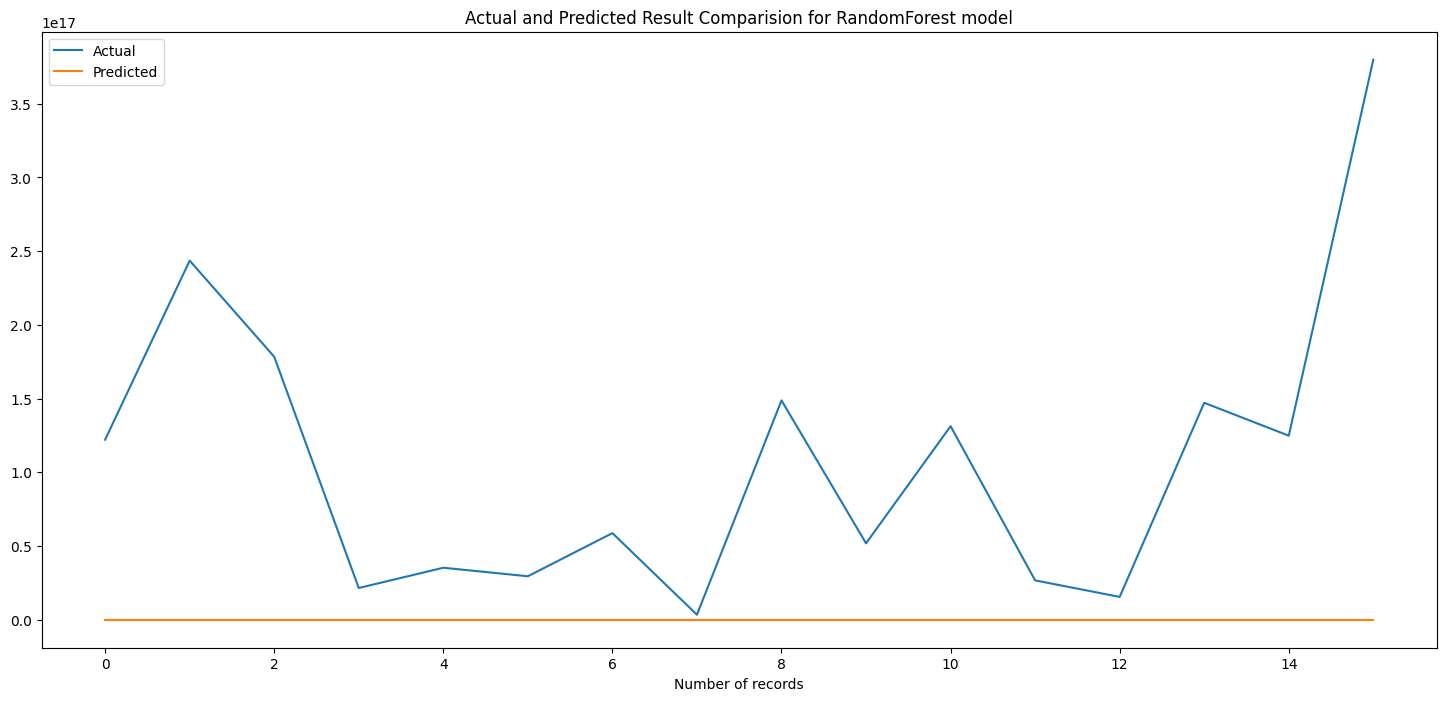

In [ ]:
rf_df.head(50).plot(figsize=(18,8))
plt.title(label="Actual and Predicted Result Comparision for RandomForest model")
plt.xlabel(xlabel="Number of records")
plt.ylabel=("values")
plt.show()

In [ ]:
RF_MSE=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('Mean Squared Error: {:.2f}'.format(RF_MSE))
print('Accuracy : {:.2f}% '.format(RF_MSE-float(1)))

Mean Squared Error: 1413891782448176.75
Accuracy : 1413891782448175.75% 


In [ ]:
importances = list(rf_model.feature_importances_)
print(importances)


[0.0015968596955883102, 0.005889560092288829, 0.0006715745929940856, 0.003469810647851296, 0.007105849673892312, 0.0031501249955347027, 0.03180091079612025, 0.001235484636786167, 0.010781412701205686, 0.1041702442571509, 0.00529666700466379, 0.008782043933330092, 0.0016991500107523263, 0.0011774816219466177, 0.0019737397683506006, 0.8111990855715441]


Type of plt before calling plt.ylabel: <class 'module'>


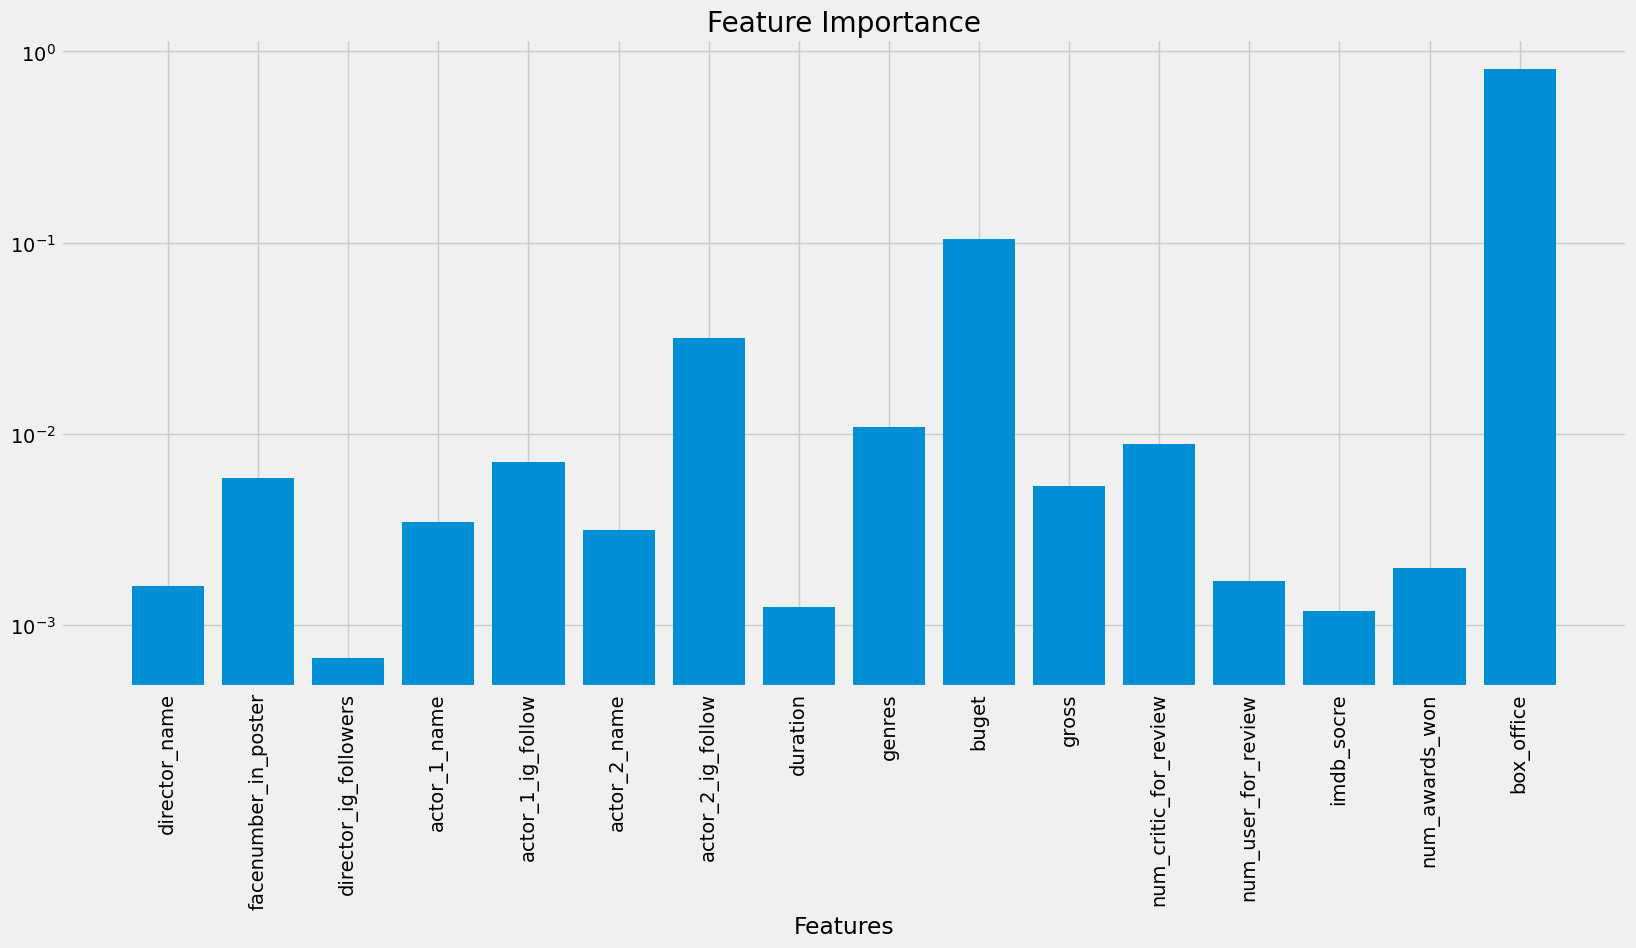

In [ ]:

print("Type of plt before calling plt.ylabel:", type(plt))
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(18, 8))
    x_values = list(range(len(importances)))
    plt.bar(x_values, importances, orientation='vertical')
    plt.xticks(x_values, feature_list)
    #plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Feature Importance')
    plt.xticks(rotation=90)
    plt.yscale("log")
    plt.show()



In [ ]:
import pickle 
with open(file="module\\X_scaled.pkl",mode="wb") as file:
    pickle.dump(obj=rf_model,file=file)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Instantiate and fit AdaBoostRegressor
ab_model = AdaBoostRegressor()
ab_model.fit(X_train_imputed, y_train)


AdaBoostRegressor()

In [ ]:
X_test_imputed = imputer.transform(X_test)

# Make predictions using the trained AdaBoostRegressor model
y_pred = ab_model.predict(X_test_imputed)

In [ ]:
y_pred=y_pred.reshape(-1,1)
y_prediction=[]
for i in range (len(y_pred)):
    y_prediction.append(list(scaler_target.inverse_transform(y_pred[[i]]))[0][0])

In [ ]:
ab_df=pd.DataFrame()
ab_df["Actual"]=y_true
ab_df["Predicted"]=y_prediction
ab_df.head(10)

# Save the trained AdaBoostRegressor model
with open("module/ab_model.pkl", "wb") as file:
    pickle.dump(ab_model, file)


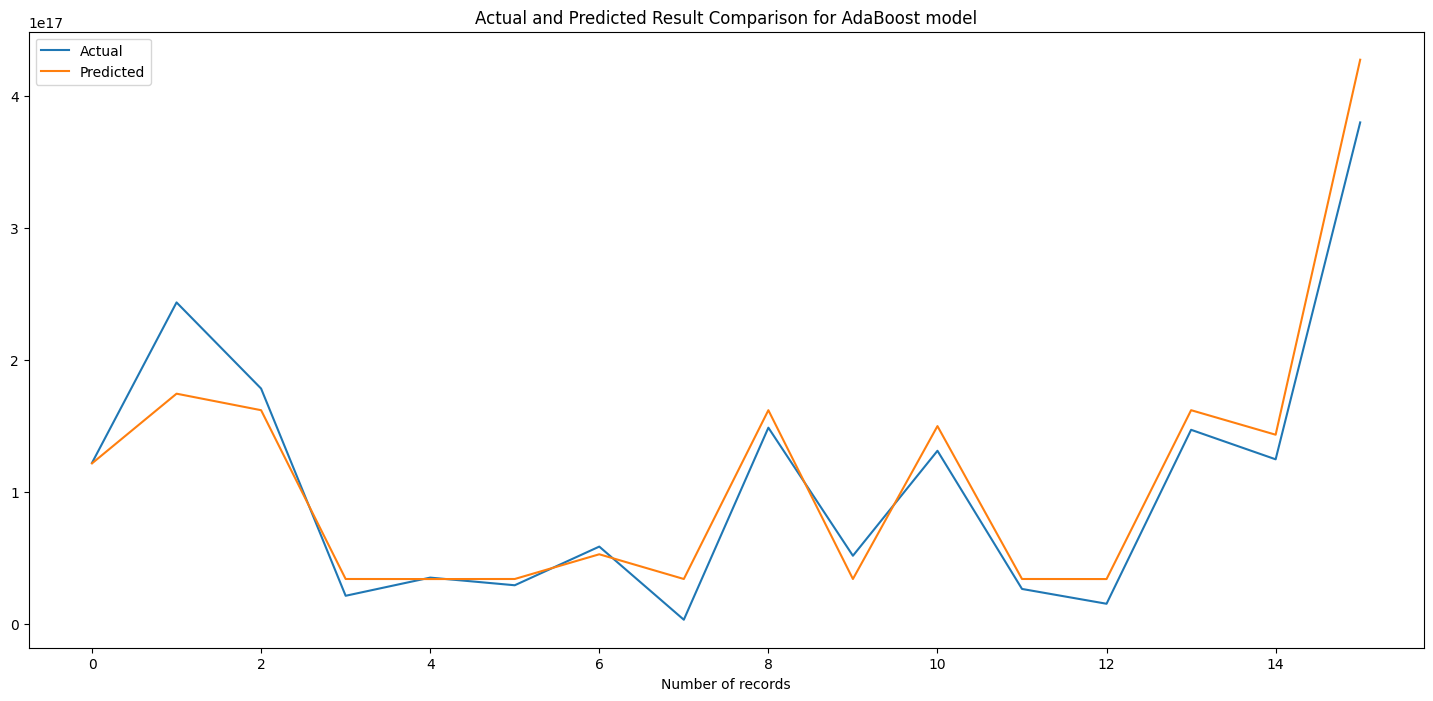

In [ ]:
ab_df.head(50).plot(figsize=(18, 8))
plt.title("Actual and Predicted Result Comparison for AdaBoost model")  # Corrected typo
plt.xlabel("Number of records")
#plt.ylabel("values")
plt.show()


In [ ]:
AB_MSE = mean_squared_error(y_true=y_test,y_pred=y_pred)
print('Mean Squared Error : {:.2f}'.format(AB_MSE))
print('Accuracy : {:.2f}% '.format(float(1)-AB_MSE))

Mean Squared Error : 3063687960882904.00
Accuracy : -3063687960882903.00% 


Support Vector Regressor Mean Squared Error: 4.899301833506613e+16


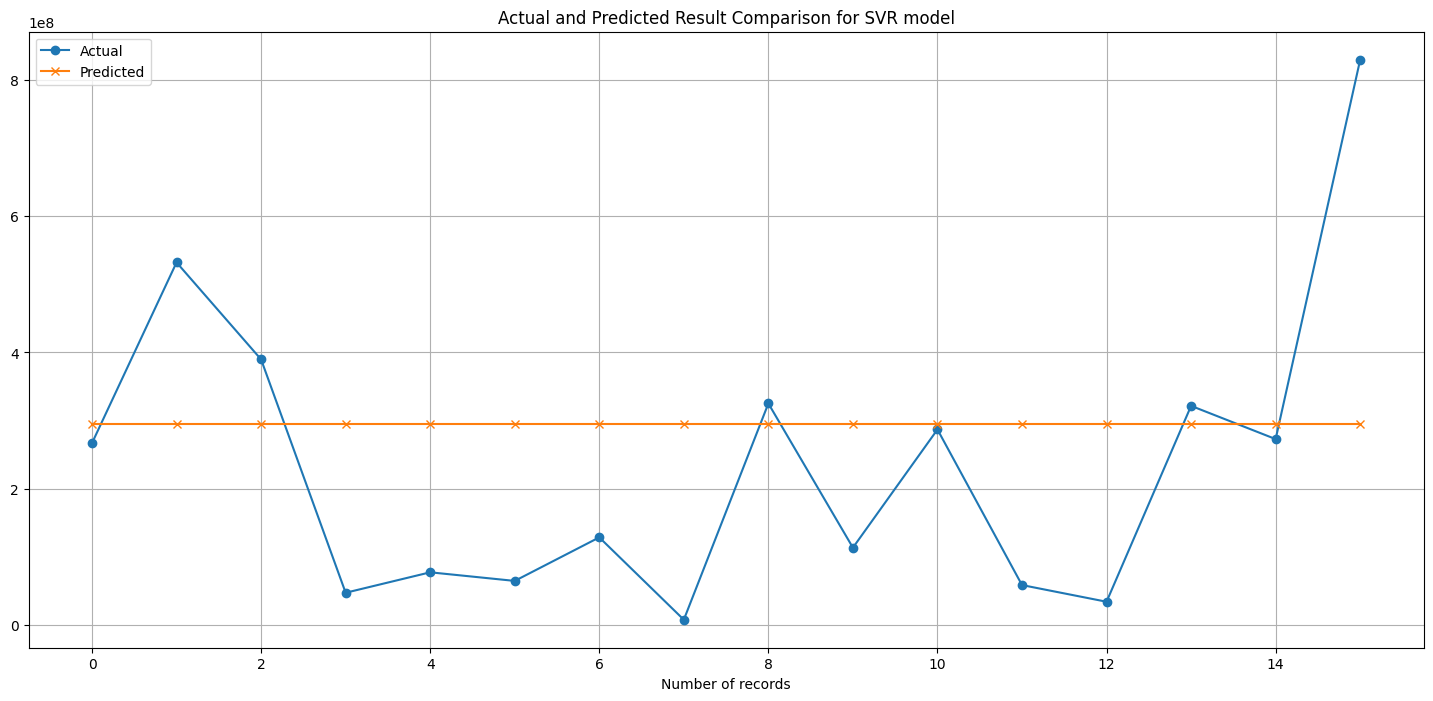

In [ ]:
from sklearn.svm import SVR

# Instantiate Support Vector Regressor model
svr_model = SVR()

# Fit the model on training data
svr_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_svr = svr_model.predict(X_test)

# Calculate Mean Squared Error
svr_mse = mean_squared_error(y_test, y_pred_svr)
print('Support Vector Regressor Mean Squared Error:', svr_mse)

# Plot graph of Actual and Predicted values for SVR model
plt.figure(figsize=(18, 8))
plt.plot(range(len(y_test[:50])), y_test[:50], label='Actual', marker='o')
plt.plot(range(len(y_pred_svr[:50])), y_pred_svr[:50], label='Predicted', marker='x')
plt.title("Actual and Predicted Result Comparison for SVR model")
plt.xlabel("Number of records")
plt.legend()
plt.grid(True)
plt.show()


Actual		Predicted
266800000.0	248266546.62211978
532171696.0	482189516.054189
389706608.4	389138867.0187211
47000000.0	34023463.24814876
77037635.0	75270359.48828669
64400000.0	62964238.32406102
128344089.0	127270280.67733134
7400000.0	26306329.703199245
325021779.0	322182484.8873134
113217955.0	102571908.61987521
286800000.0	290981345.18498576
58300000.0	54627267.484440565
33800000.0	40728973.17980754
321500000.0	321422577.04076433
272700000.0	290945114.1437061
829900000.0	872163423.9968044
0     266800000.0
1     532171696.0
2     389706608.4
3      47000000.0
4      77037635.0
5      64400000.0
6     128344089.0
7       7400000.0
8     325021779.0
9     113217955.0
10    286800000.0
11     58300000.0
12     33800000.0
13    321500000.0
14    272700000.0
15    829900000.0
Name: box_office, dtype: float64
Gradient Boosting Regressor Mean Squared Error: 355854840752658.75
Gradient Boosting Regressor R^2 Score: 0.992157078387416


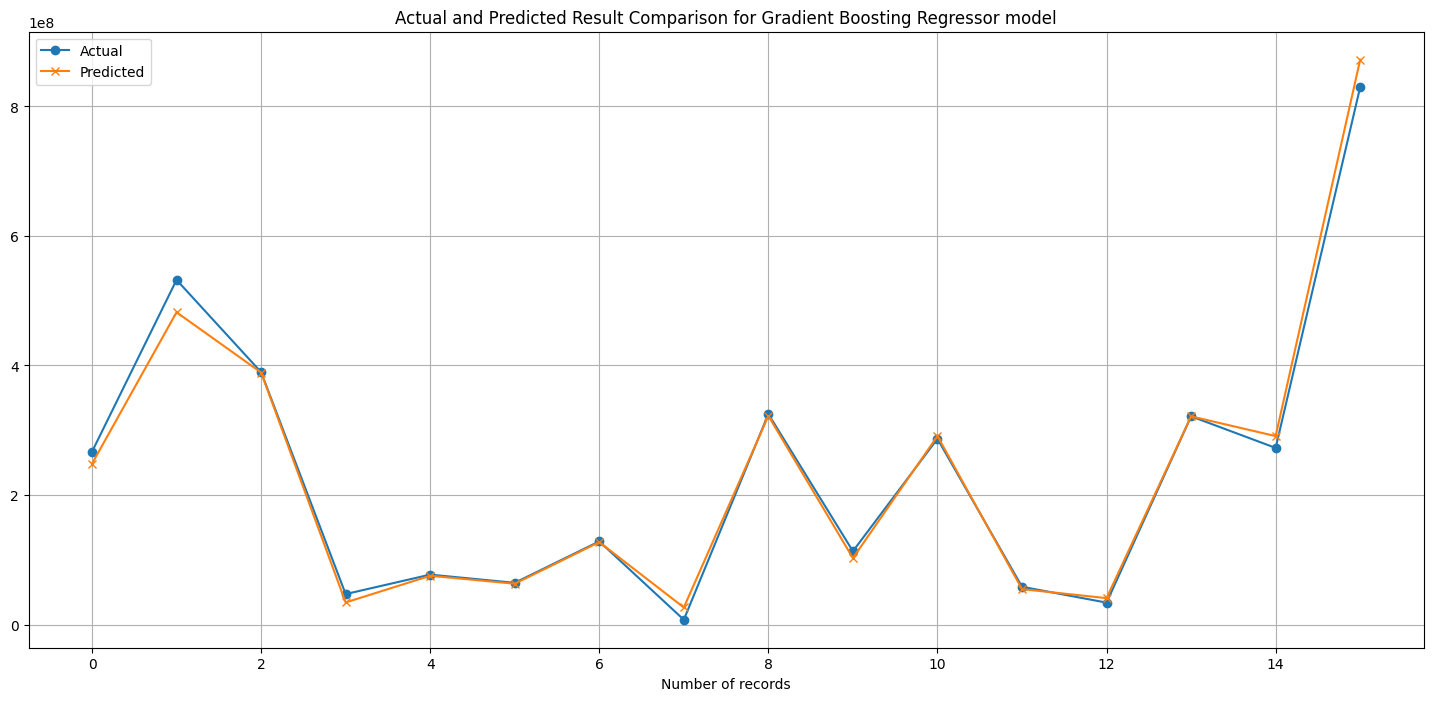

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

# Fit the model on training data
gb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_gb = gb_model.predict(X_test)

# Display the first 50 predicted and actual values
print("Actual\t\tPredicted")
for actual, predicted in zip(y_test[:50], y_pred_gb[:50]):
    print(f"{actual}\t{predicted}")

print(y_test)


# Calculate Mean Squared Error
gb_mse = mean_squared_error(y_test, y_pred_gb)
print('Gradient Boosting Regressor Mean Squared Error:', gb_mse)
gb_r2_score = gb_model.score(X_test, y_test)
print('Gradient Boosting Regressor R^2 Score:', gb_r2_score)

# Plot graph of Actual and Predicted values for Gradient Boosting Regressor model
plt.figure(figsize=(18, 8))
plt.plot(range(len(y_test[:50])), y_test[:50], label='Actual', marker='o')
plt.plot(range(len(y_pred_gb[:50])), y_pred_gb[:50], label='Predicted', marker='x')
plt.title("Actual and Predicted Result Comparison for Gradient Boosting Regressor model")
plt.xlabel("Number of records")
plt.legend()
plt.grid(True)
plt.show()

# Save the trained Gradient Boosting Regressor model
with open("module/gb_model.pkl", "wb") as file:
    pickle.dump(gb_model, file)


In [ ]:
importance = list(ab_model.feature_importances_)
print(importances)

[0.0015968596955883102, 0.005889560092288829, 0.0006715745929940856, 0.003469810647851296, 0.007105849673892312, 0.0031501249955347027, 0.03180091079612025, 0.001235484636786167, 0.010781412701205686, 0.1041702442571509, 0.00529666700466379, 0.008782043933330092, 0.0016991500107523263, 0.0011774816219466177, 0.0019737397683506006, 0.8111990855715441]


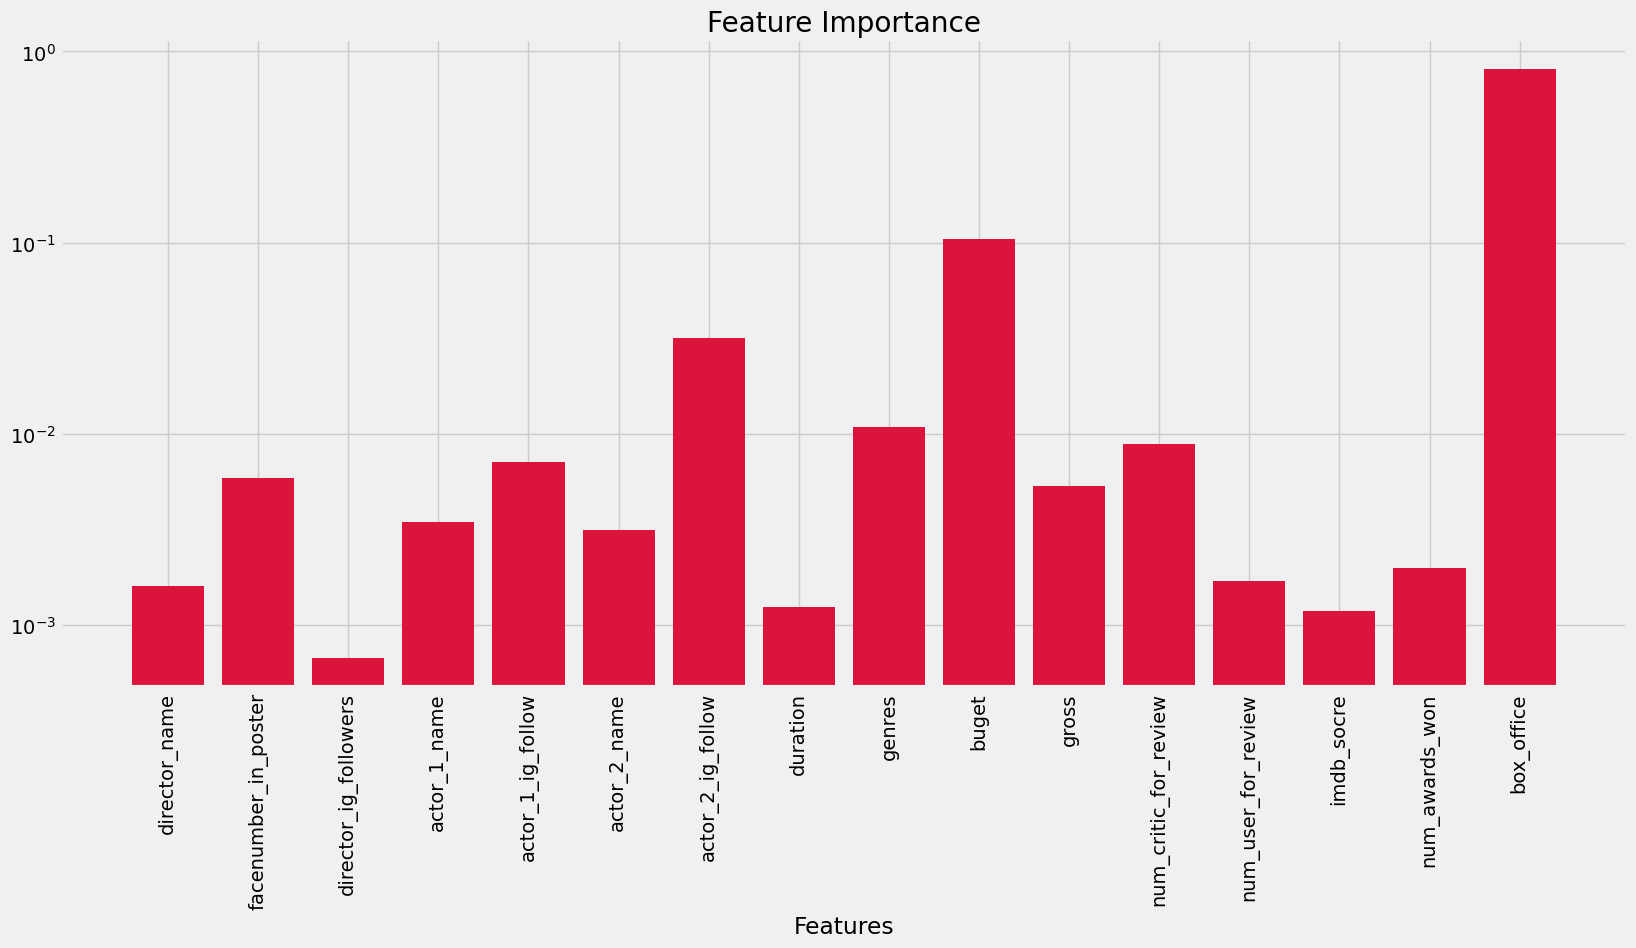

In [ ]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(18,8))
    x_values = list(range(len(importances)))
    plt.bar(x_values,importances,orientation = 'vertical',color="crimson")
    plt.xticks(x_values,feature_list)
    #plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Feature Importance')
    plt.xticks(rotation=90)
    plt.yscale("log")
    plt.show()

In [ ]:
import pickle 
with open(file="C:\\Users\\LENOVO\\box office\\module\\X_scaled.pkl",mode="wb") as file:
    pickle.dump(obj=rf_model,file=file)